In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.RBM_model import RBM
from src.generate import generer_image_RBM
from src.load_dataset import lire_alpha_digit, get_image_size
from src.generate import  generer_image_RBM, display_images

In [2]:
X = lire_alpha_digit(['A'])

In [9]:
p,q = X.shape[1], 100
rbm = RBM(p,q)
history, weights, free_energy, weight_snapshots, gradients, avg_activations, hidden_probs_snapshots  = rbm.train_RBM(X, learning_rate=0.01, batch_size=10, epochs=2000)

100%|██████████| 2000/2000 [00:06<00:00, 305.28it/s]


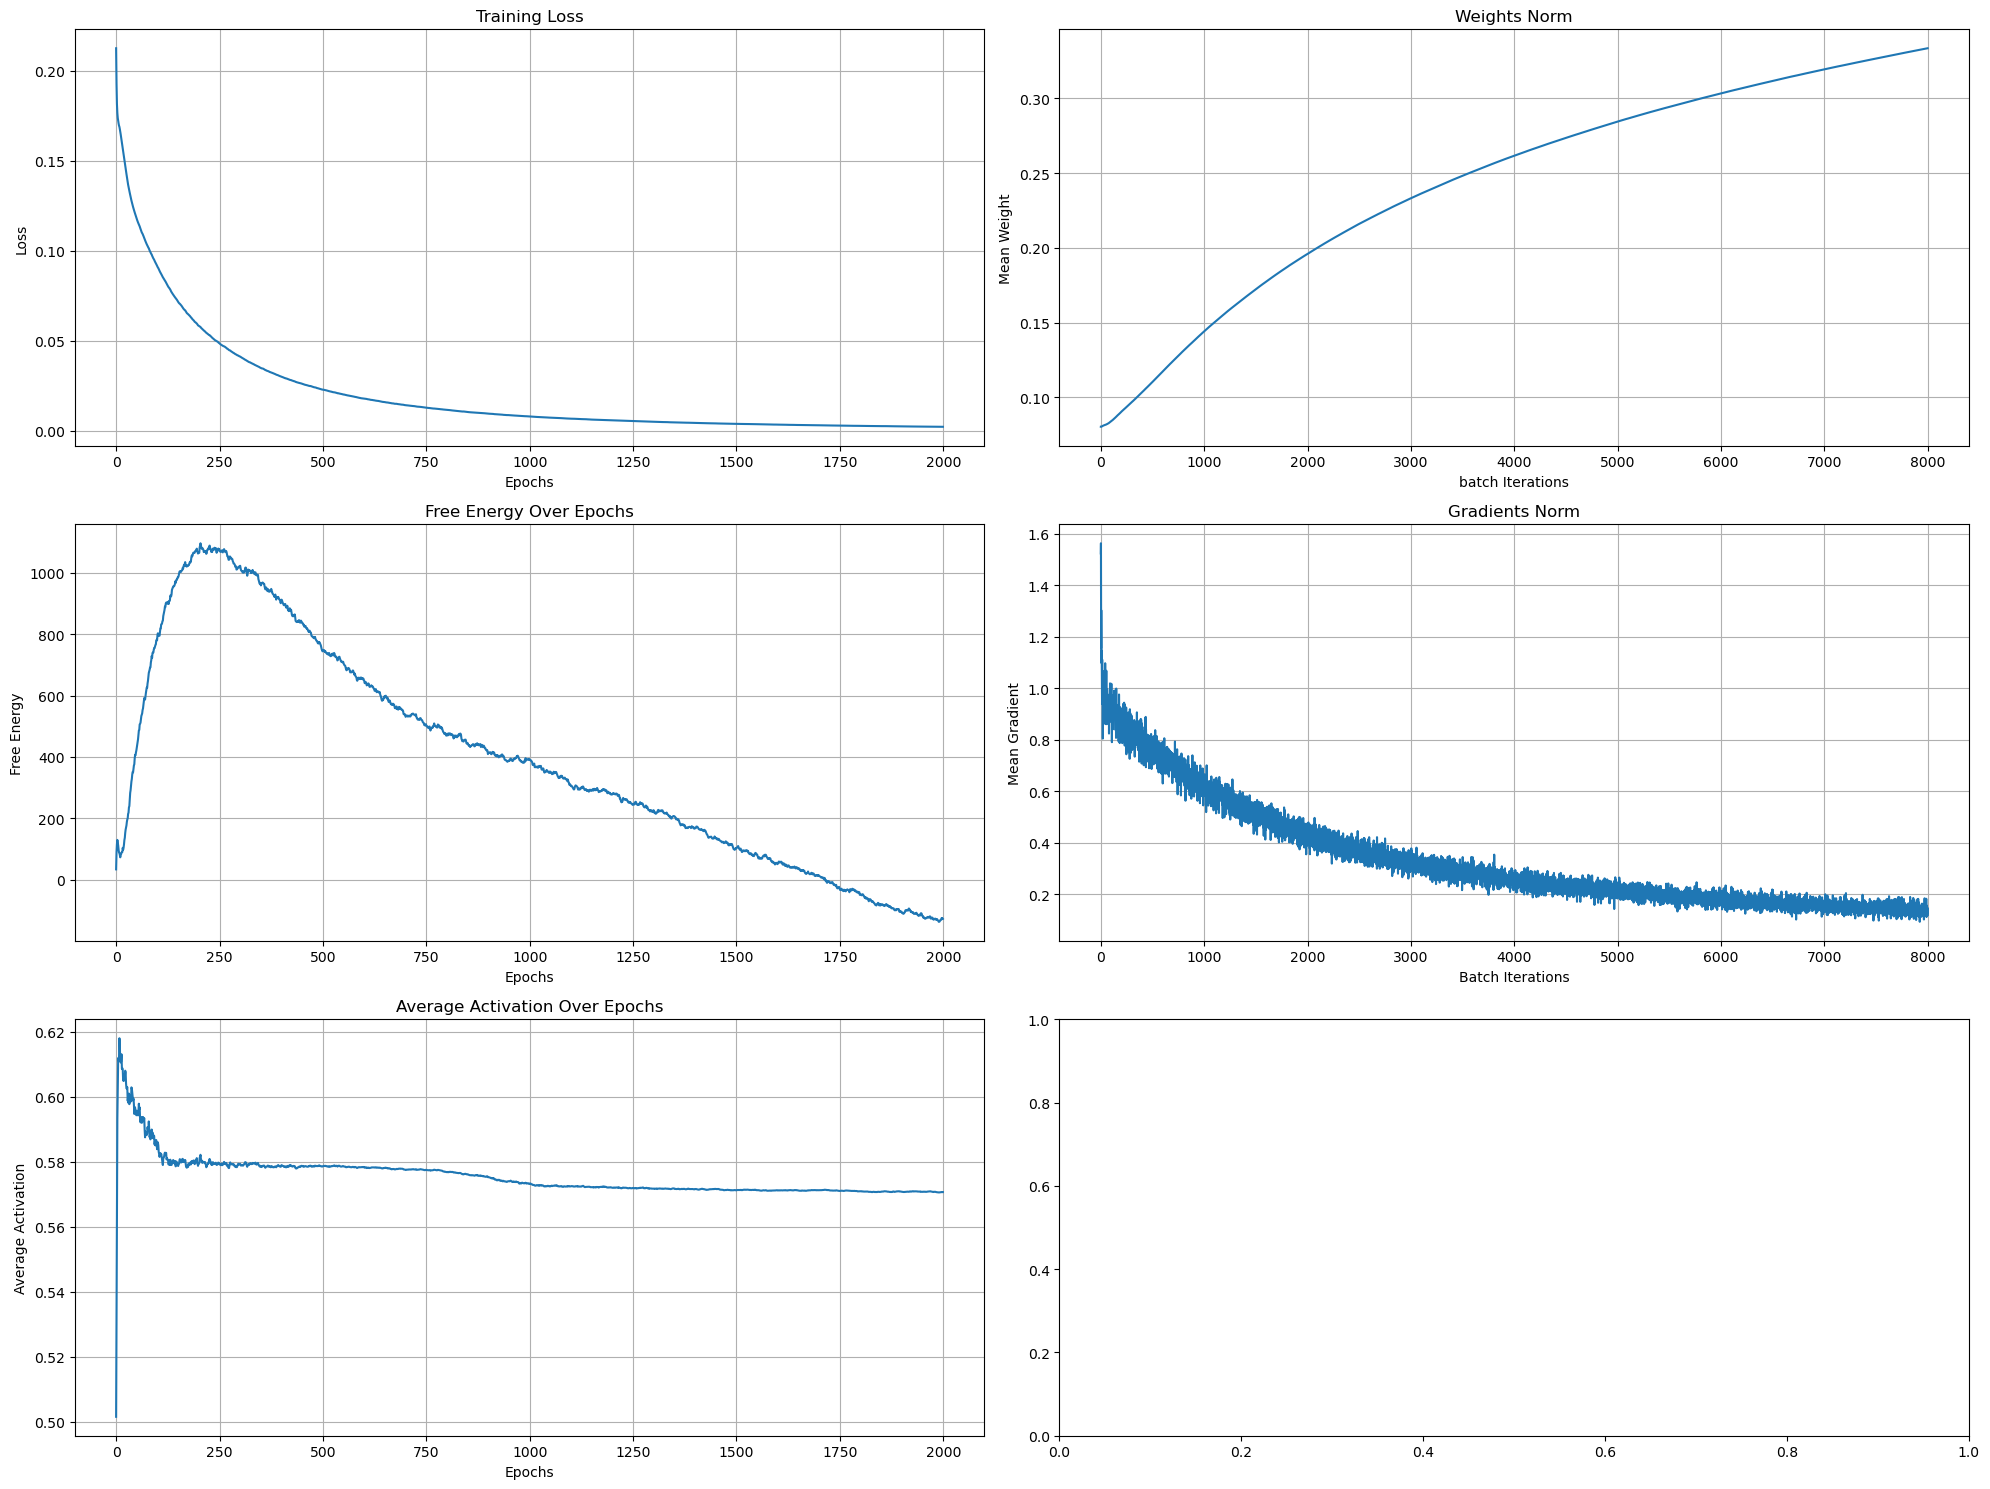

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

# Plotting the loss
axs[0, 0].plot(history)
axs[0, 0].set_title('Training Loss')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].grid(True)

# Plotting the weights
axs[0, 1].plot(weights)
axs[0, 1].set_title('Weights Norm')
axs[0, 1].set_xlabel('batch Iterations')
axs[0, 1].set_ylabel('Mean Weight')
axs[0, 1].grid(True)

# Plotting the free energy
axs[1, 0].plot(free_energy)
axs[1, 0].set_title('Free Energy Over Epochs')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Free Energy')
axs[1, 0].grid(True)

# Plotting the gradients
axs[1, 1].plot(gradients)
axs[1, 1].set_title('Gradients Norm')
axs[1, 1].set_xlabel('Batch Iterations')
axs[1, 1].set_ylabel('Mean Gradient')
axs[1, 1].grid(True)

# Plotting the average activation
axs[2, 0].plot(avg_activations)
axs[2, 0].set_title('Average Activation Over Epochs')
axs[2, 0].set_xlabel('Epochs')
axs[2, 0].set_ylabel('Average Activation')
axs[2, 0].grid(True)

plt.tight_layout()
plt.show()

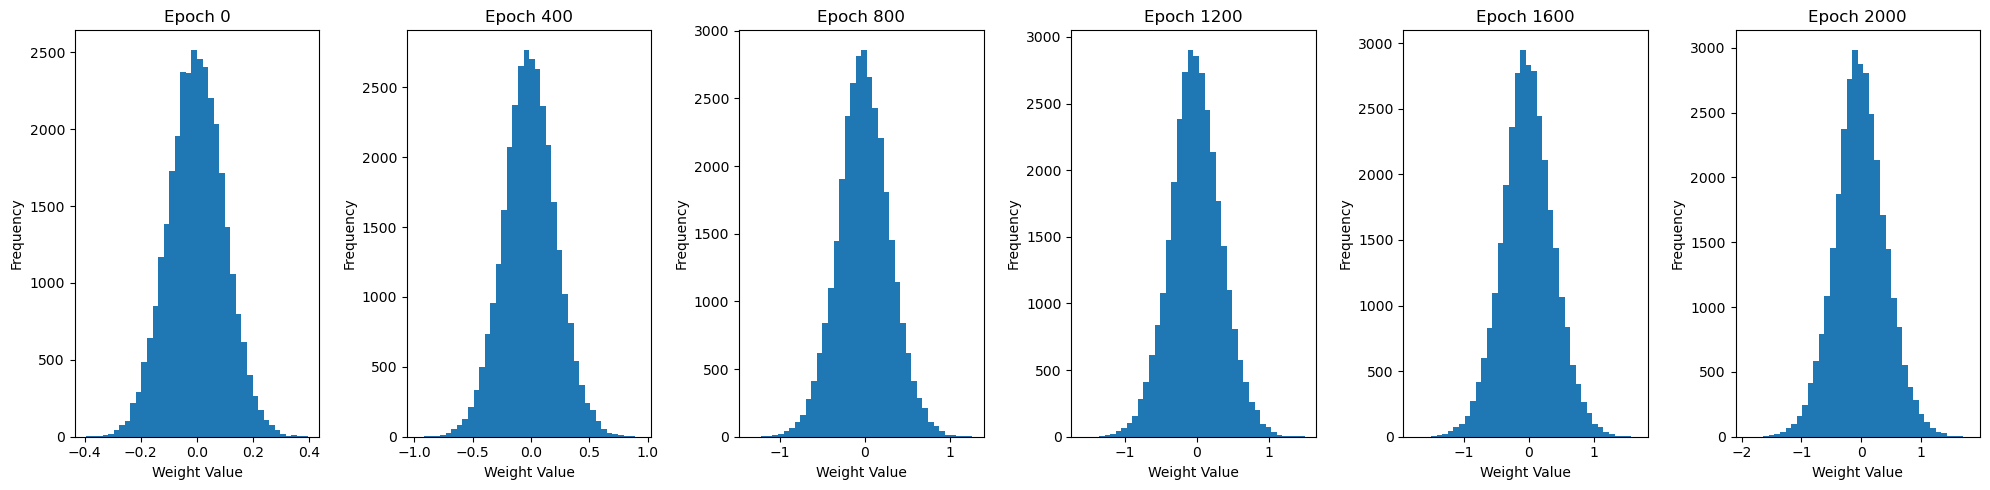

In [5]:
fig, axs = plt.subplots(1, len(weight_snapshots), figsize=(20, 5))
for i, weights in enumerate(weight_snapshots):
    axs[i].hist(weights.flatten(), bins=40)
    axs[i].set_title(f'Epoch {i*400}')
    axs[i].set_xlabel('Weight Value')
    axs[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


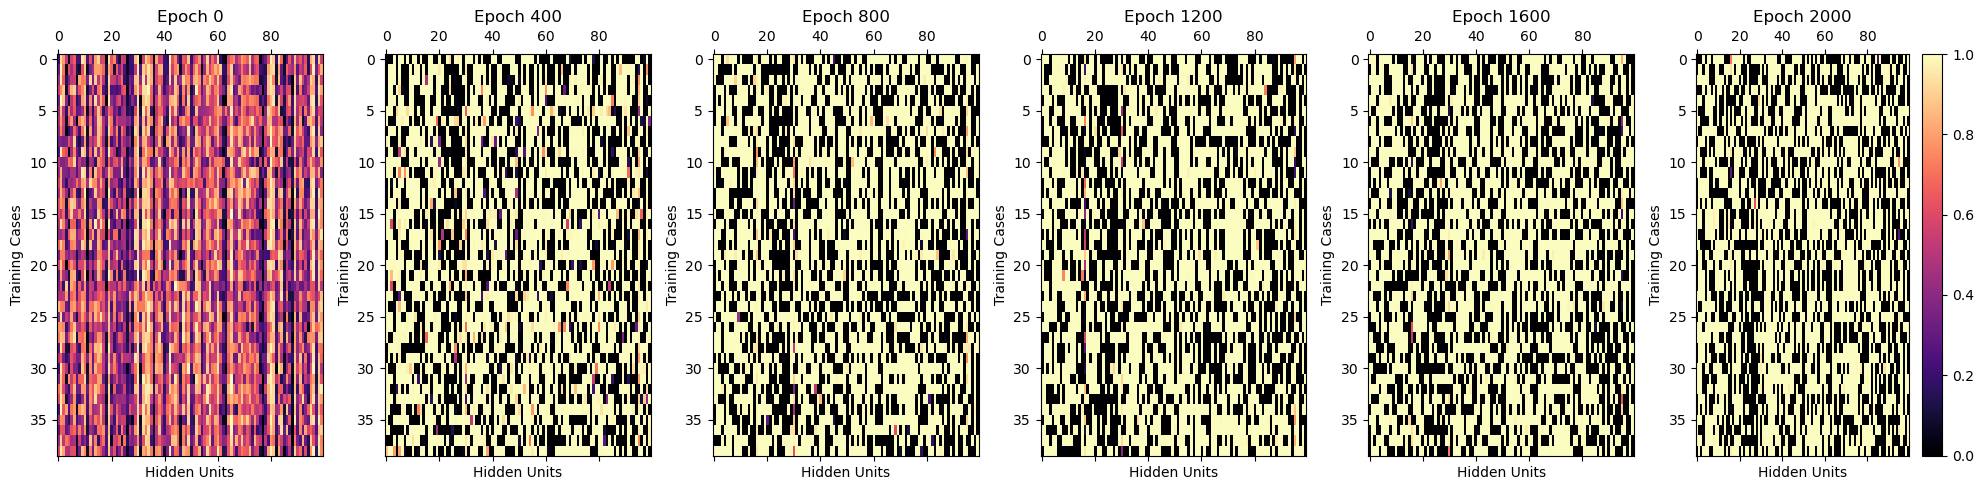

In [6]:
fig, axs = plt.subplots(1, len(hidden_probs_snapshots), figsize=(20, 5))

for i, hidden_probs in enumerate(hidden_probs_snapshots):
    cax = axs[i].matshow(hidden_probs, cmap='magma', aspect='auto')
    axs[i].set_title(f'Epoch {i*400}')
    axs[i].set_xlabel('Hidden Units')
    axs[i].set_ylabel('Training Cases')

plt.colorbar(cax)
plt.tight_layout()
plt.show()

(20, 16)


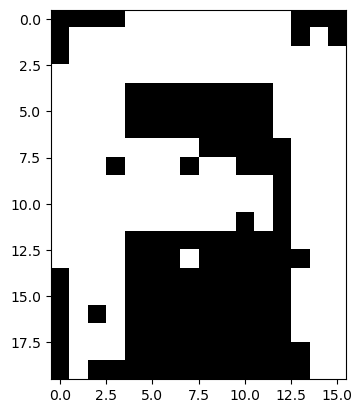

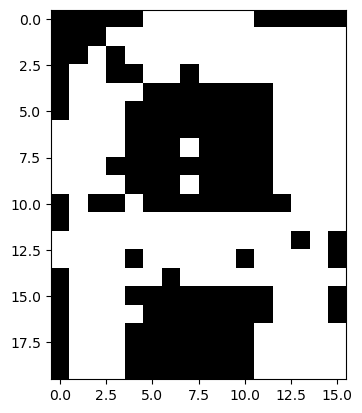

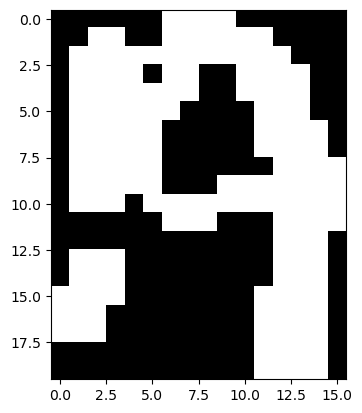

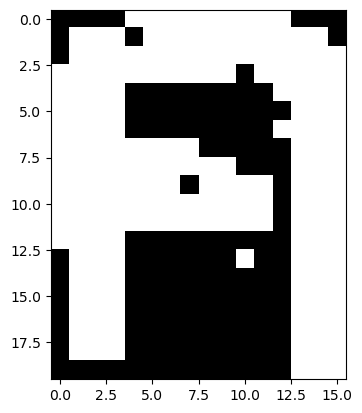

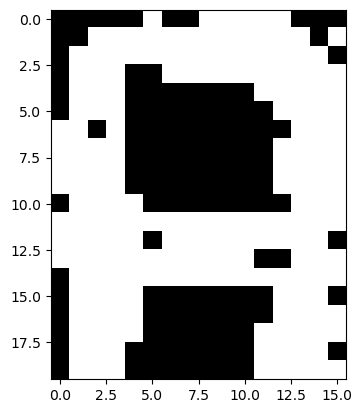

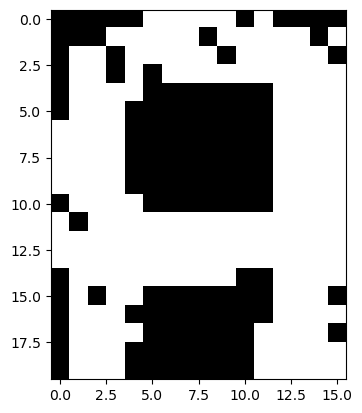

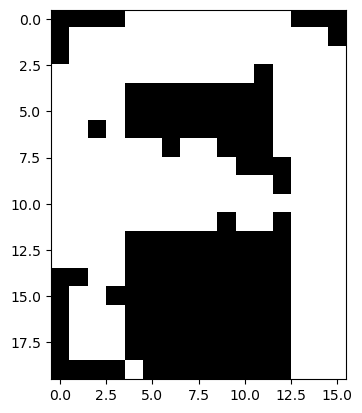

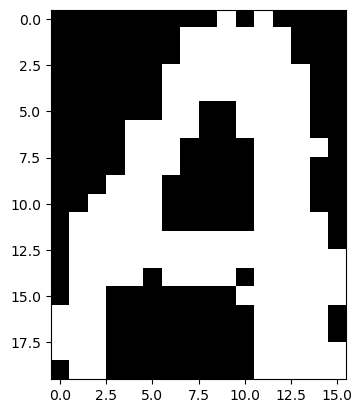

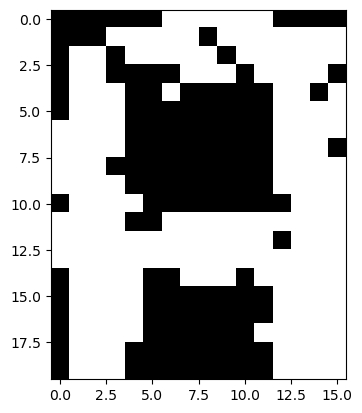

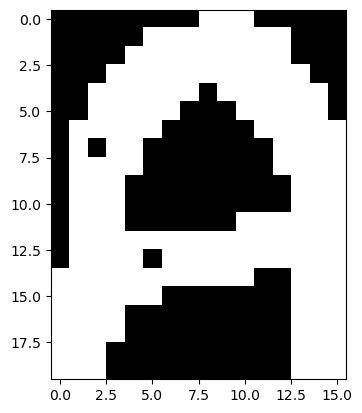

In [7]:
taille_image = get_image_size()
print(taille_image)
images = generer_image_RBM(model=rbm, nb_images=10, nb_iter=200, size_img=taille_image)
display_images(images, taille_image)